# Regression Analysis of Real Estate Data

**Dataset Description:**

This dataset contains real estate data, specifically focusing on  house transactions. Below is a summary of the dataset's columns and their descriptions:

- X1 transaction date: The date of the transaction.
- X2 house age: The age of the house at the time of the transaction.
- X3 distance to the nearest MRT station: The distance from the house to the nearest - MRT (Mass Rapid Transit) station.
- X4 number of convenience stores: The number of convenience stores within walking - distance from the house.
- X5 latitude: The latitude coordinate of the house.
- X6 longitude: The longitude coordinate of the house.
- Y house price of unit area: The price of the house per unit area.

## 1.Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## 2.Exploratory Data Analysis

### 2.1.Data Loading

In [2]:
data=pd.read_csv("/kaggle/input/real-estate-price-prediction/Real estate.csv",usecols=(2,3,4,5,6,7))
data.head(3)

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3


### 2.2 Data Cleaning

- Data Types

In [3]:
data.dtypes

X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

- Missing Values

In [4]:
data.isnull().sum()

X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

- Duplicates

In [5]:
data.duplicated().sum()

0

### 2.3 Data Profiling and Visualization

- Descriptive Statistics

In [6]:
data.describe()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


- Data Distribution 

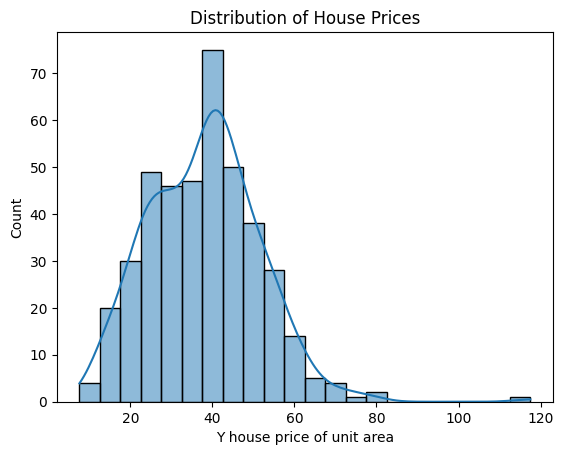

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['Y house price of unit area'], kde=True)
plt.title('Distribution of House Prices')
plt.show()


- Majority of house prices fall between 20 and 60.
- Fewer houses with very high prices (beyond 80).

- Bivariate Analysis

In this section, we will examine the relationships between the target variable ``(house price per unit area)`` and the other features

-  House Price vs. Distance to Nearest MRT Station

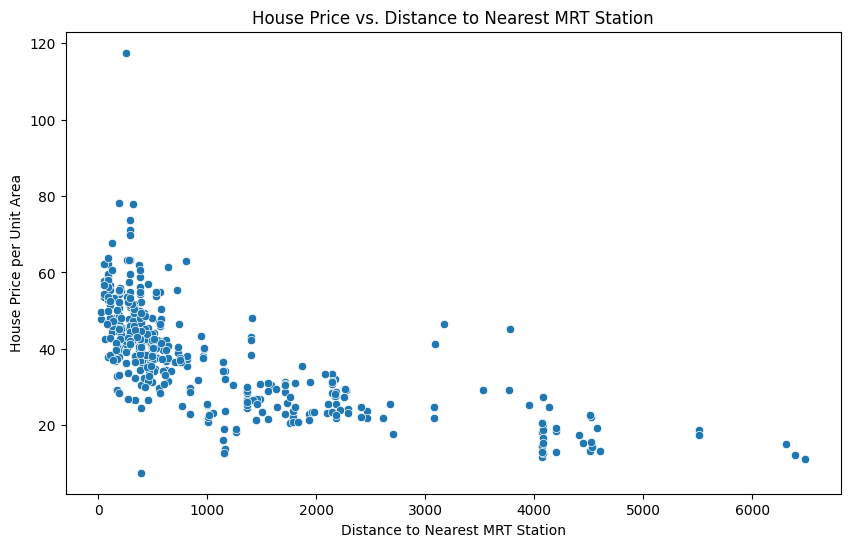

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['X3 distance to the nearest MRT station'], y=data['Y house price of unit area'])
plt.title('House Price vs. Distance to Nearest MRT Station')
plt.xlabel('Distance to Nearest MRT Station')
plt.ylabel('House Price per Unit Area')
plt.show()

* **Negative Correlation**: The plot shows a negative correlation between house prices and distance to the nearest MRT station, as the distance to the MRT station increases, the house price per unit area decreases.
* **High Concentration of Data Points Near MRT Stations**:A large number of data points are clustered at distances close to the MRT station, indicating that most houses in the dataset are located relatively close to MRT stations. This is because proximity to public transportation is a desirable feature.

- Correlation Matrix

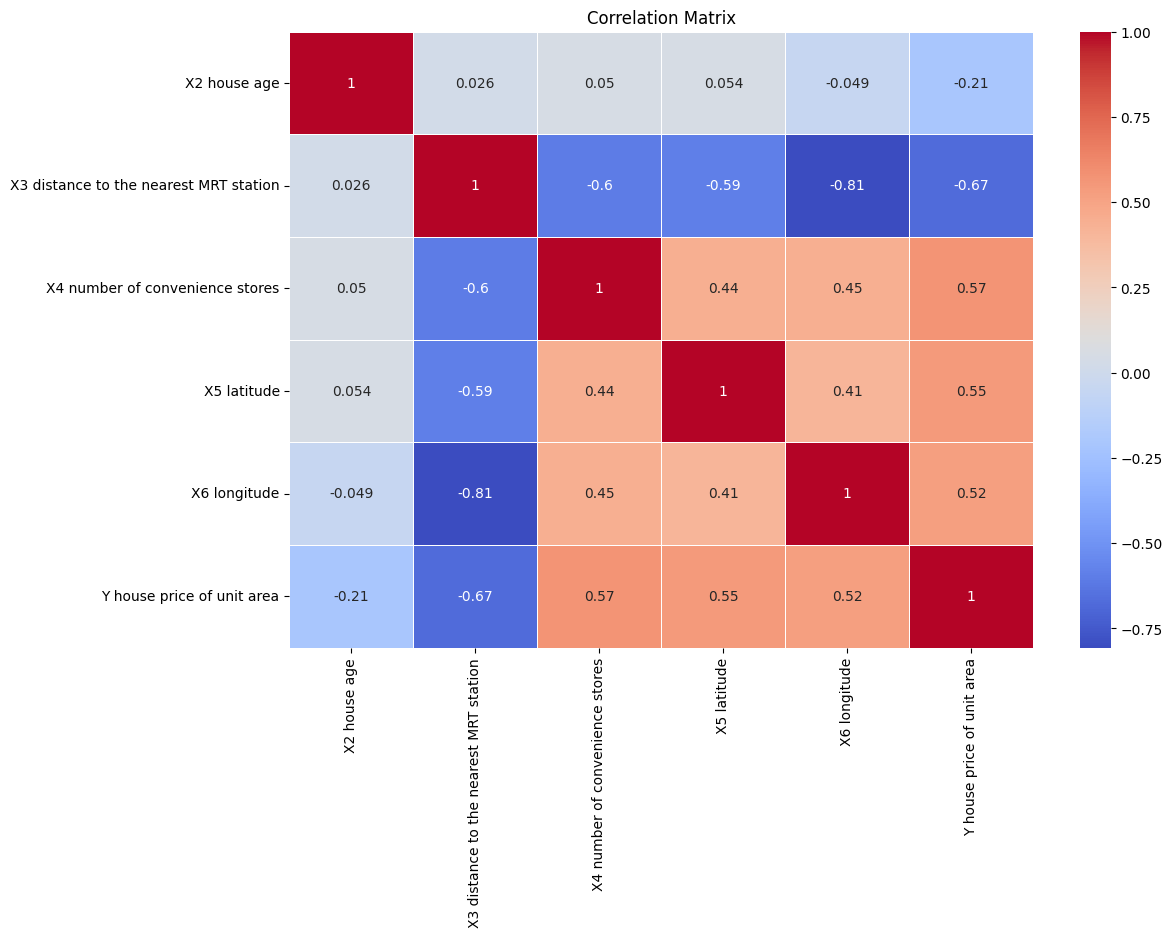

In [9]:
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


- Feature Scaling

In [10]:
features = data[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
target = data['Y house price of unit area']


features_np = features.values


means = np.mean(features_np, axis=0)
stds = np.std(features_np, axis=0)

features_standard_scaled = (features_np - means) / stds

data_scaled = pd.DataFrame(features_standard_scaled, columns=features.columns)

 ## 3 Build and Train the Regression Model

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

print("Coefficients:")
print(model.coef_)

print("Intercept:")
print(model.intercept_)

Mean Squared Error: 54.58094520086211
R-squared: 0.6746481382828178
Coefficients:
[-3.0790039  -5.7388054   3.25126781  2.92641771 -0.36641104]
Intercept:
38.051143871297825


* Predict the target variable for the new data.

In [12]:
new_data = {
    'X2 house age': [36.0],
    'X3 distance to the nearest MRT station': [89.87882],
    'X4 number of convenience stores': [8],
    'X5 latitude': [24.98298],
    'X6 longitude': [121.54024]
}
new_data_df = pd.DataFrame(new_data, columns=features.columns)  # Ensure columns are in the same order as training

new_data_standard_scaled = (new_data_df - means) / stds

new_predictions = model.predict(new_data_standard_scaled)

print("\n House Price Prediction:")
print(new_predictions)


 House Price Prediction:
[45.07332275]
